In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\skill based learning\DATA SCIENCE\Learn_Projects\Netflix TV SHOWS Clustering\final_netflix_imputed.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### data has been scrapped and imputed, we only need to do EDA and model building; also feature exttraction if possible

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# 7 rows are missing rating, just fill the most frequent

In [5]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [6]:
df.rating.fillna("TV-MA", inplace = True)

In [7]:
def improve(df, feature):
    l = []
    for i, x in enumerate(df[feature]):
        
        if len(x.split(",")) > 5:
            if len(x.split(",")[0]) == 1:
                #print(i, x)
                l.append(i)

    for j in l:
        dir_ = df.loc[j, feature] 
        #print(j, dir_)
        new_val = ""
        for k,x in enumerate(dir_):
            if k+1 != len(dir_):
                if x == ',' and dir_[k+1] == ',':
                    new_val += ','
                    #print("yes", end= "")
                elif x == ",": continue
                else:
                    new_val +=x
            else:
                new_val +=x

        df.loc[j, feature] = ", ".join("".join(new_val.split()).split(","))

improve(df, 'director')
improve(df, 'cast')

### **EDA**

In [8]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [10]:
from EDA import plot 
plot.ipynb_set()

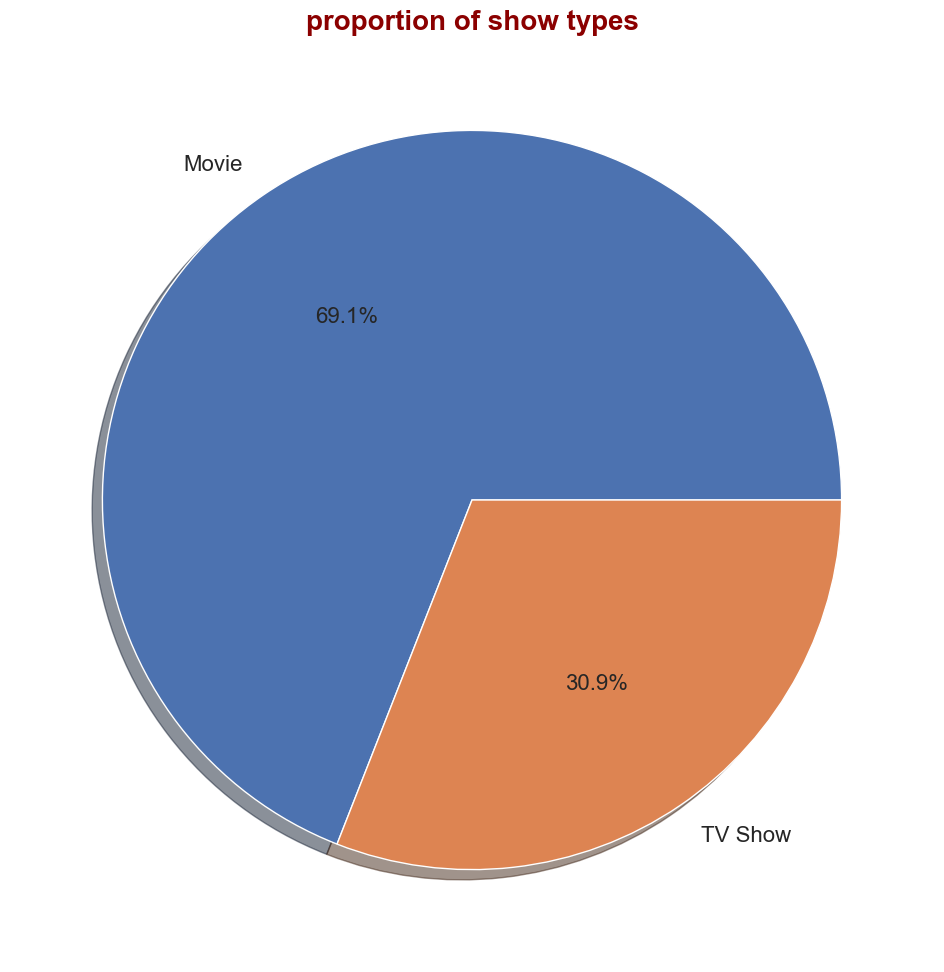

In [11]:
aux = df.type.value_counts()
plot.pie(aux, aux.index, 'proportion of show types')

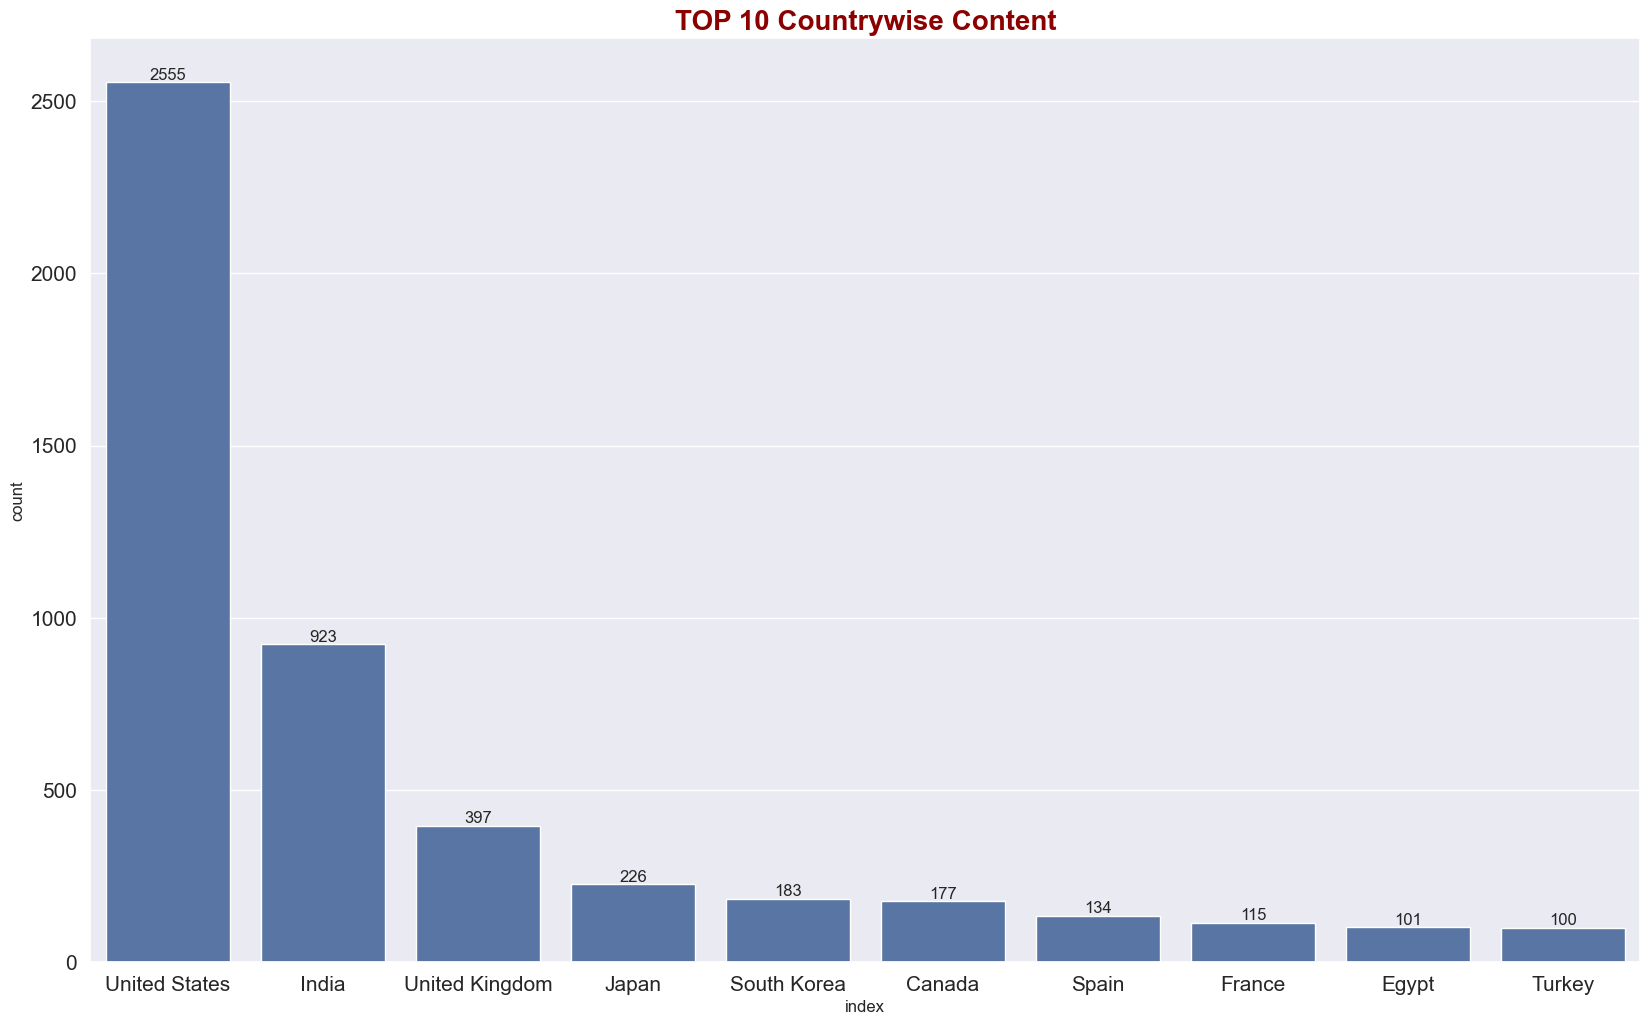

In [12]:
aux = df.country.value_counts().reset_index(name = 'count')
plot.bar(aux[:10], 'index', 'count', 'TOP 10 Countrywise Content', True, None)

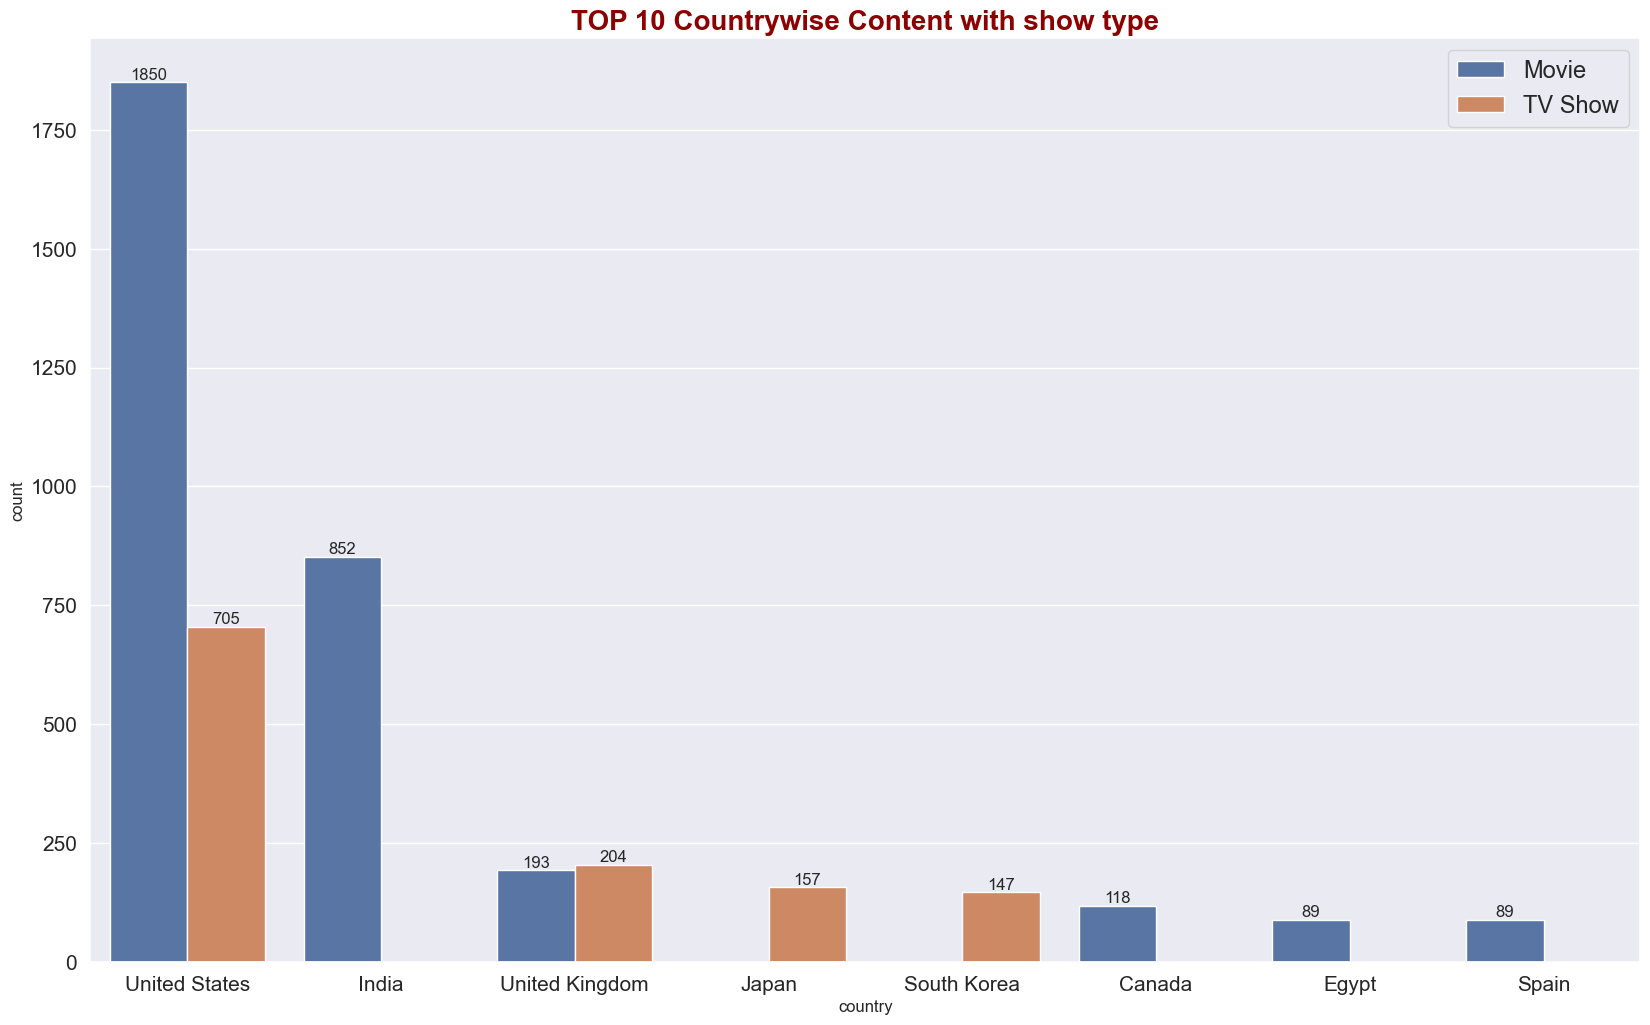

In [13]:
aux = df.groupby(['country', 'type']).title.count().reset_index()
aux.columns = ['country', 'type', 'count']
aux = aux.sort_values(by = 'count', ascending = False)
plot.bar(aux[:10], 'country', 'count', 'TOP 10 Countrywise Content with show type', True, 'type')

In [14]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


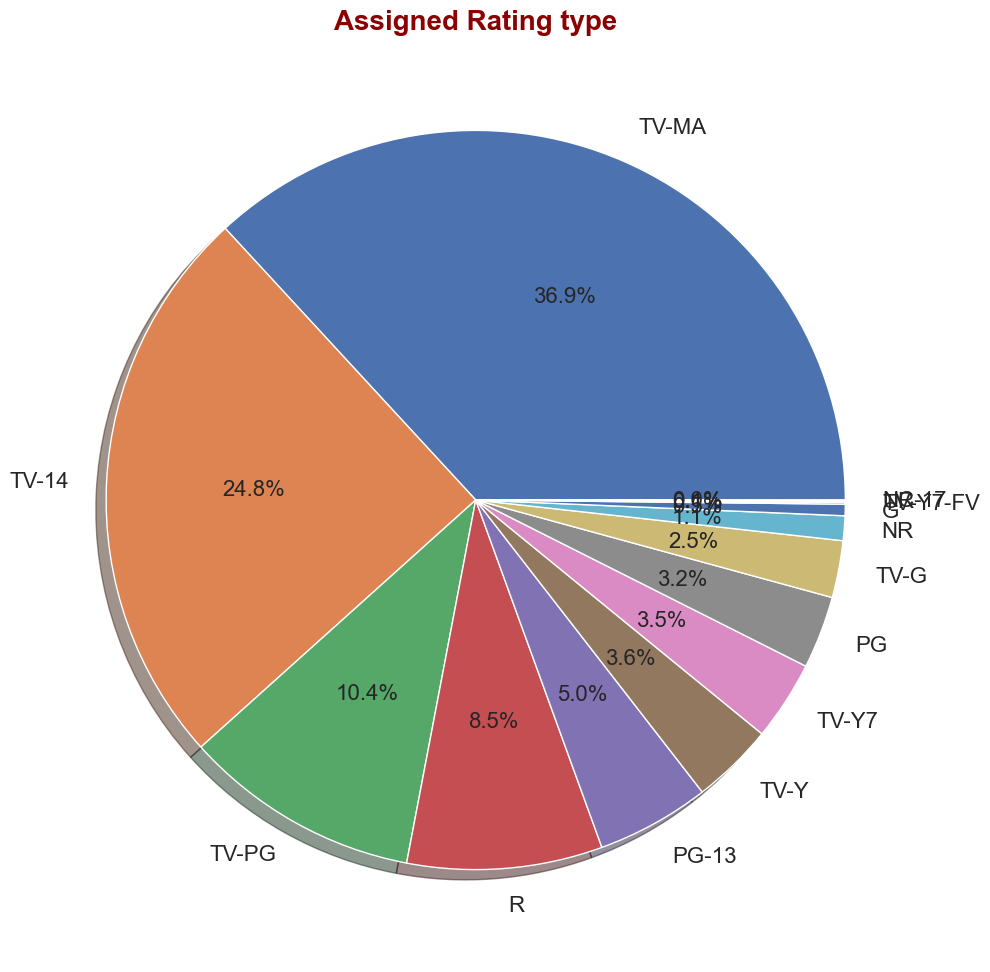

In [15]:
aux = df.rating.value_counts()
plot.pie(aux, aux.index, 'Assigned Rating type')

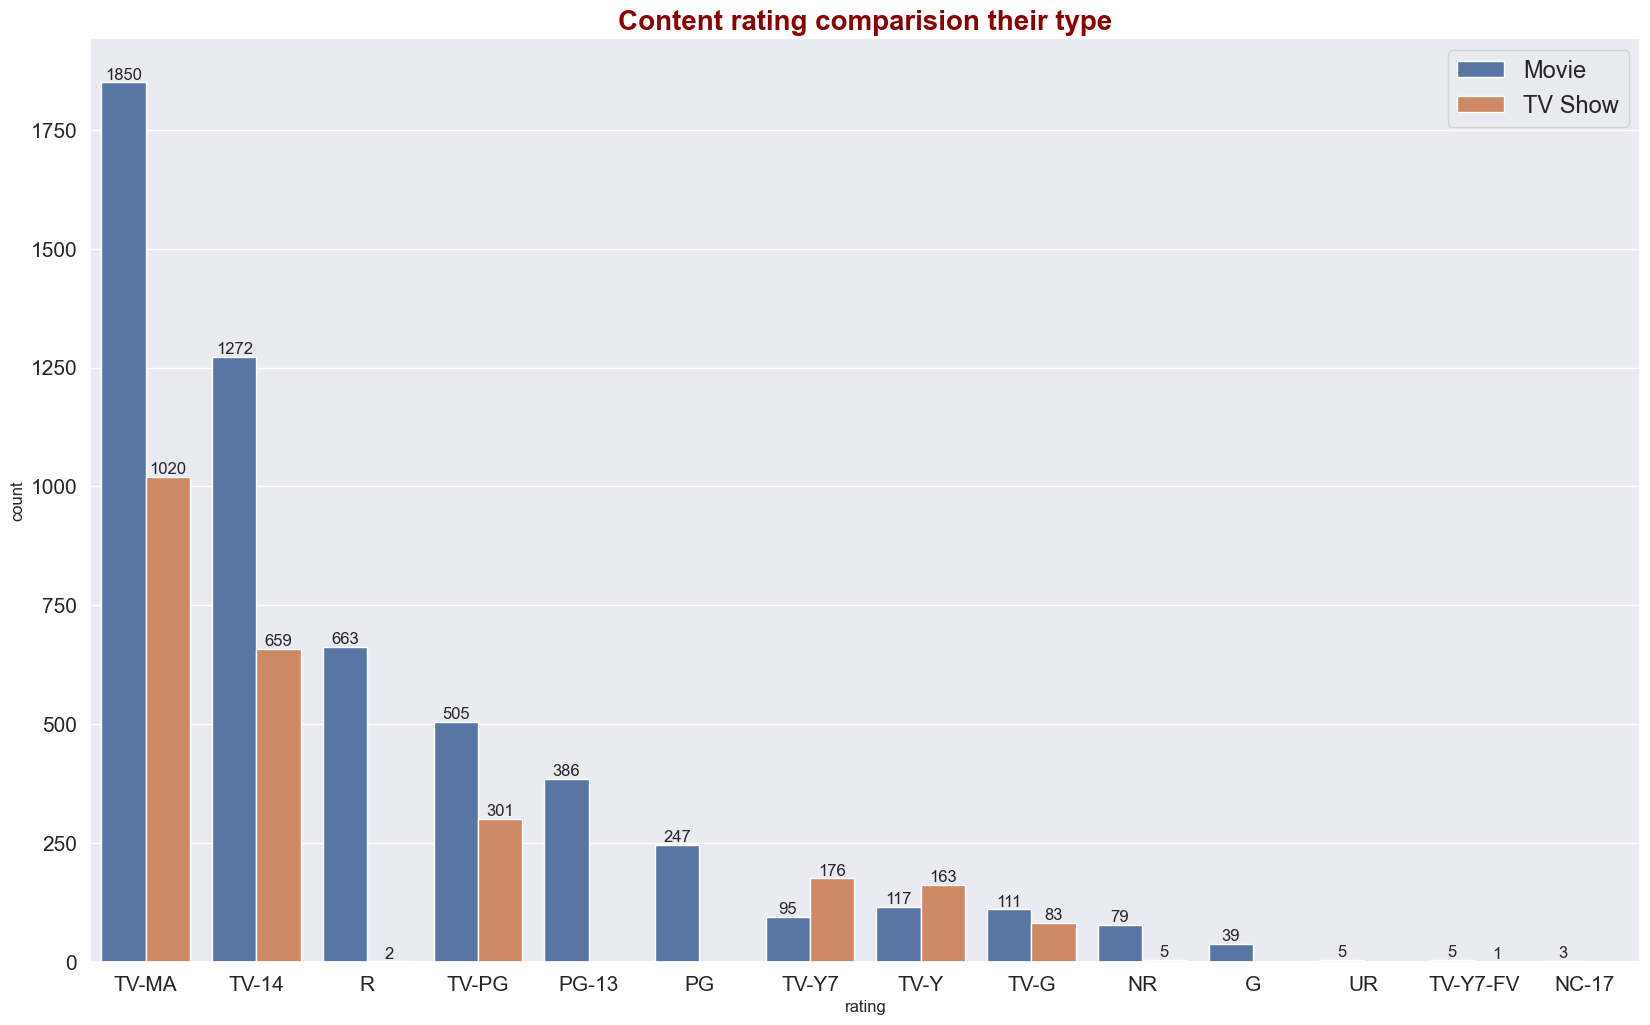

In [16]:
aux = df.groupby(['type', 'rating']).title.count().reset_index()
aux.columns = ['type', 'rating', 'count']
aux = aux.sort_values(by = 'count', ascending= False)
plot.bar(aux, 'rating', 'count', 'Content rating comparision their type', True, 'type')

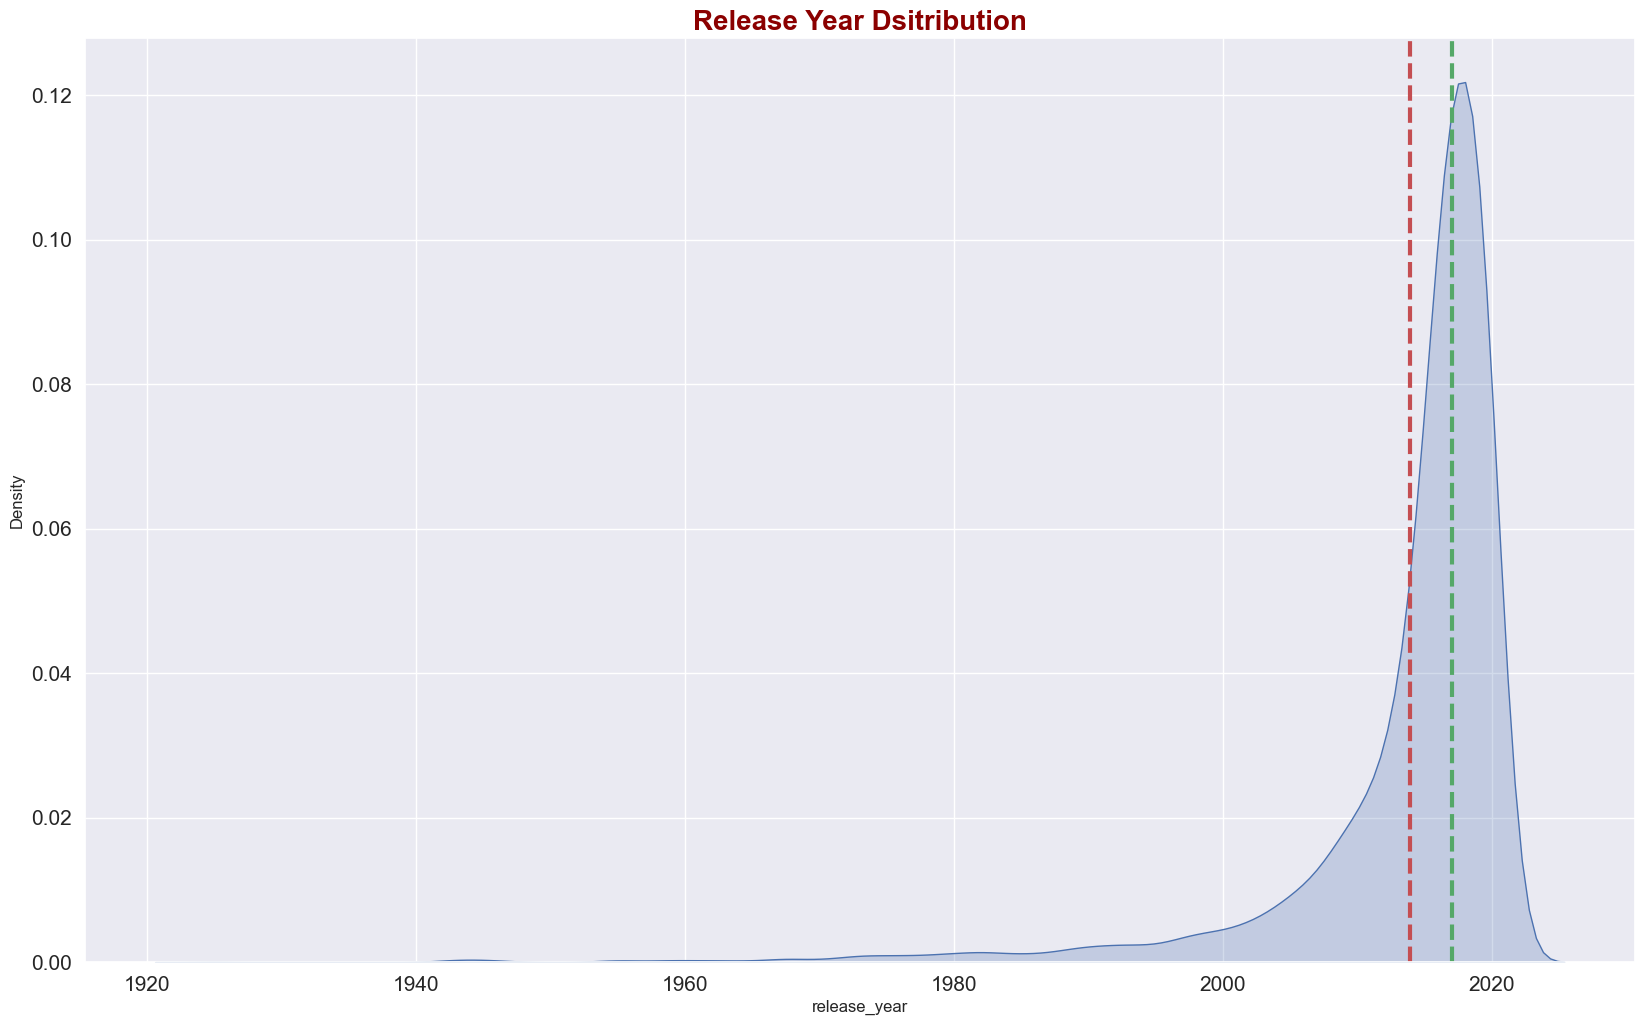

In [17]:
plot.kde(df, 'release_year', 'Release Year Dsitribution', True)

In [18]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


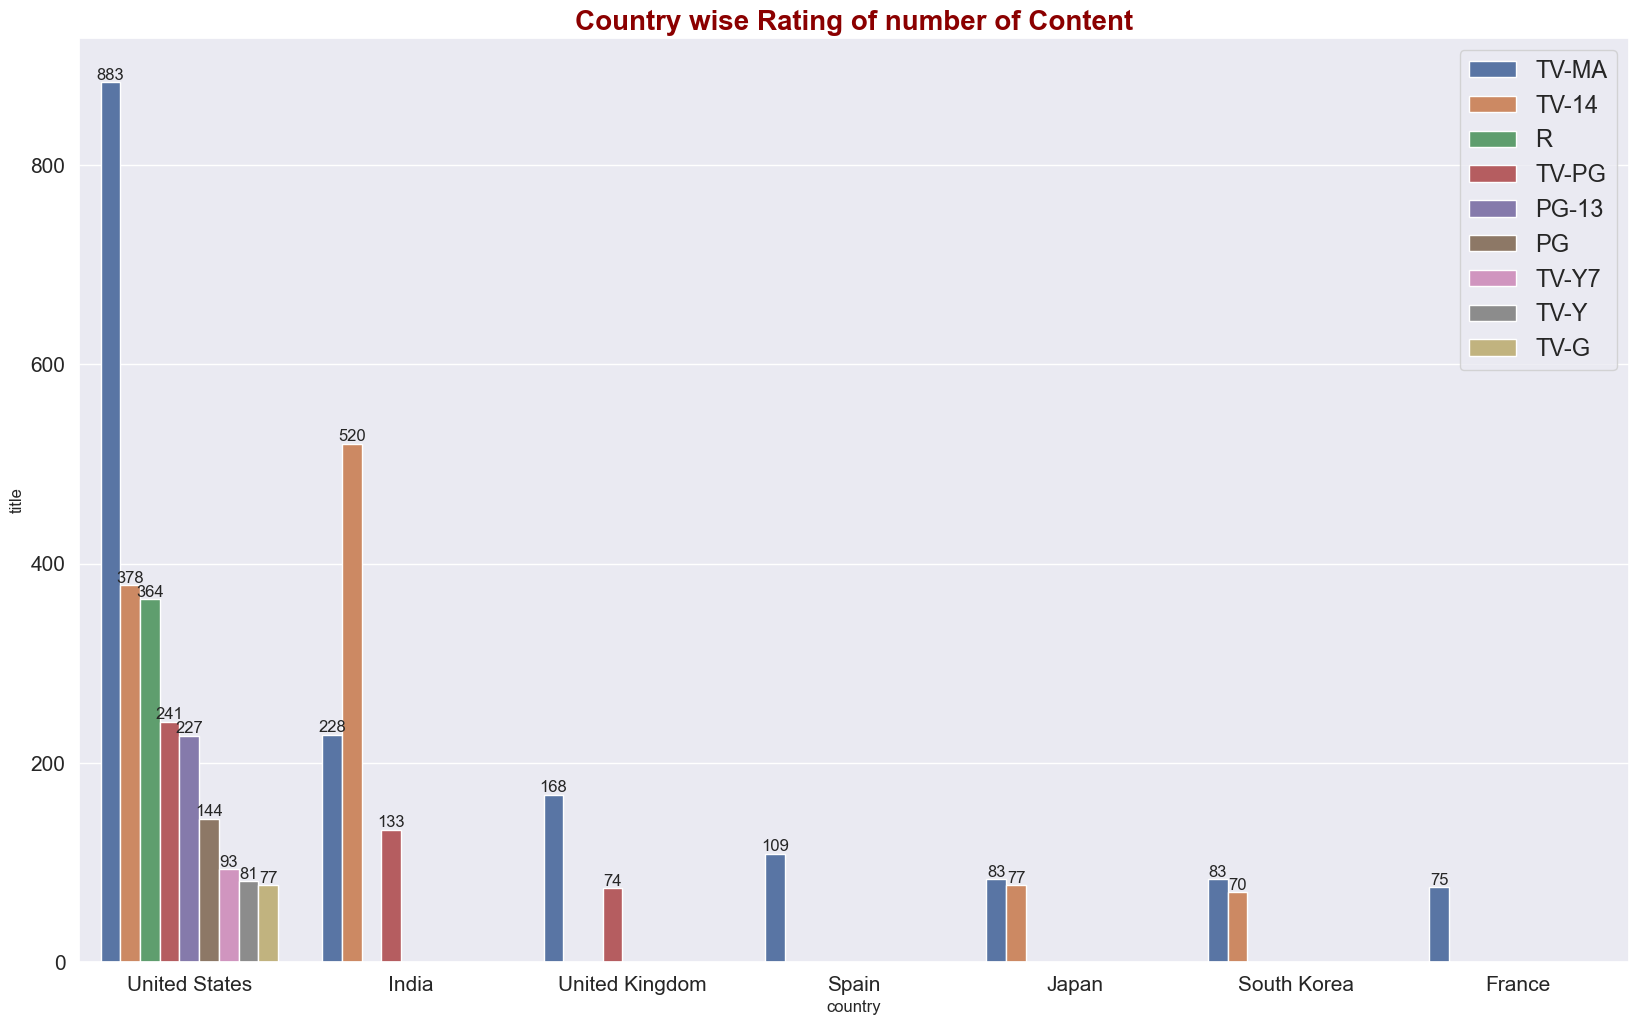

In [19]:
aux = df.groupby(['rating', 'country']).title.count().reset_index()
aux = aux.sort_values(by = 'title', ascending = False)
plot.bar(aux[:20],'country','title', 'Country wise Rating of number of Content', True, 'rating', 0)

In [20]:
df['movie_duration'] = df.duration.apply(lambda x : int(x.split()[0]) if 'min' in x else np.nan)

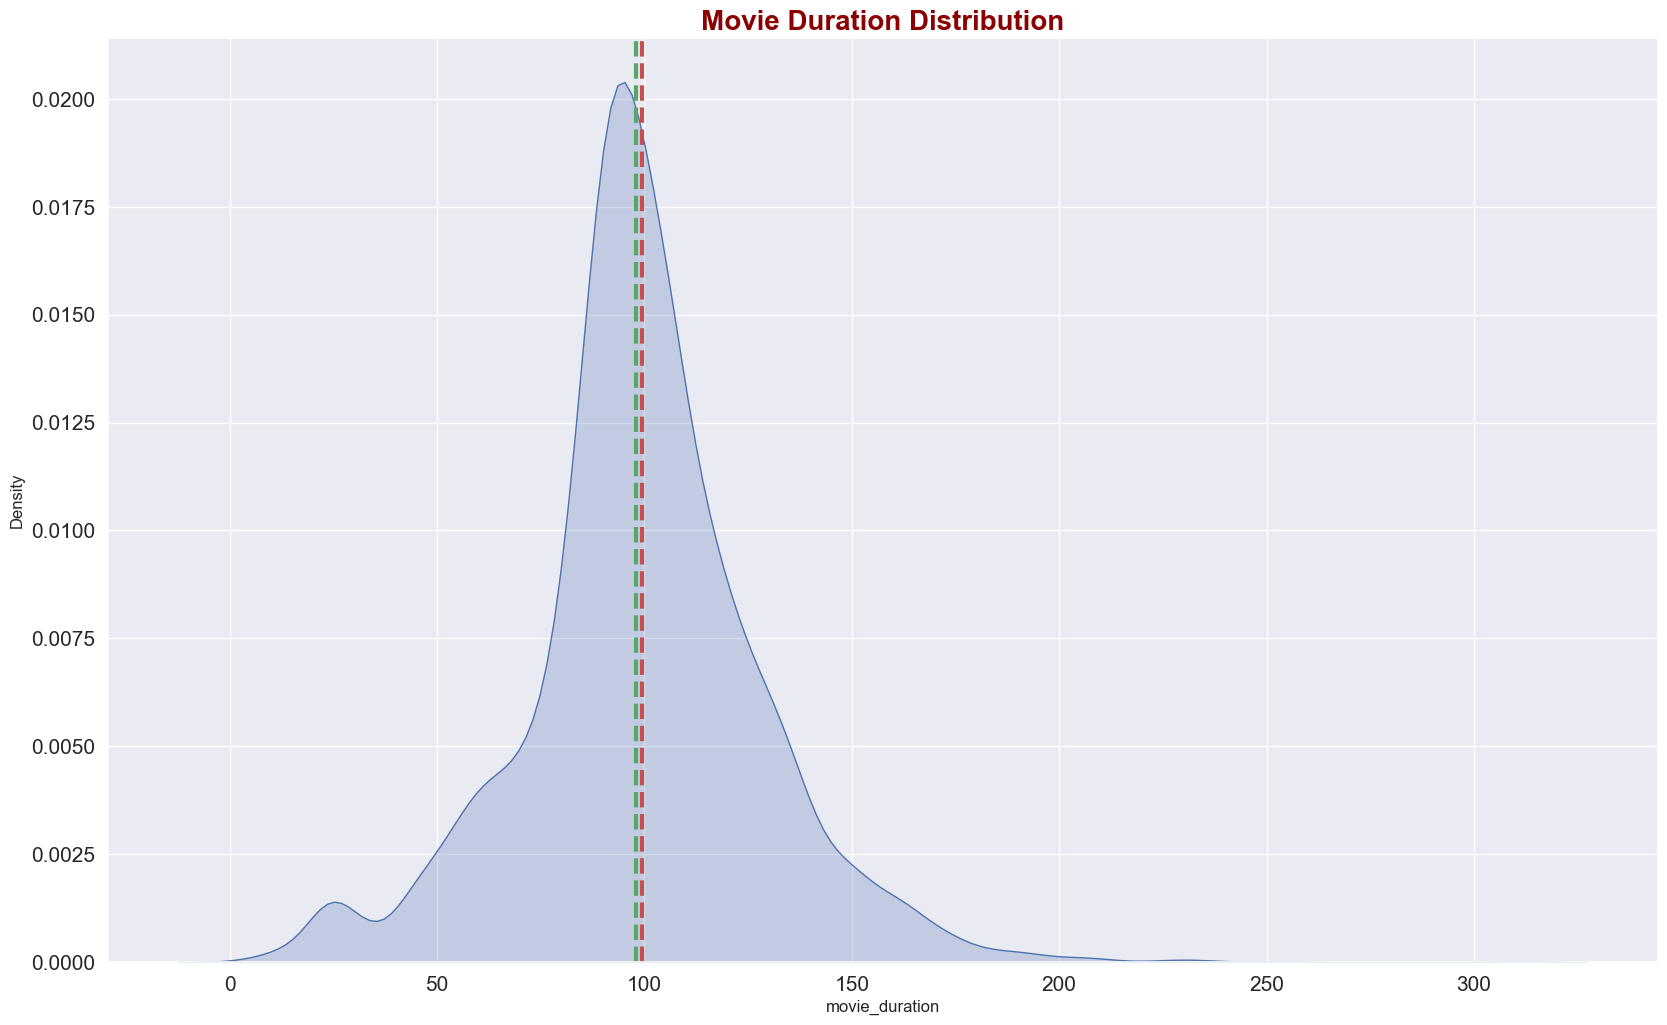

In [21]:
plot.kde(df, 'movie_duration', 'Movie Duration Distribution', True)

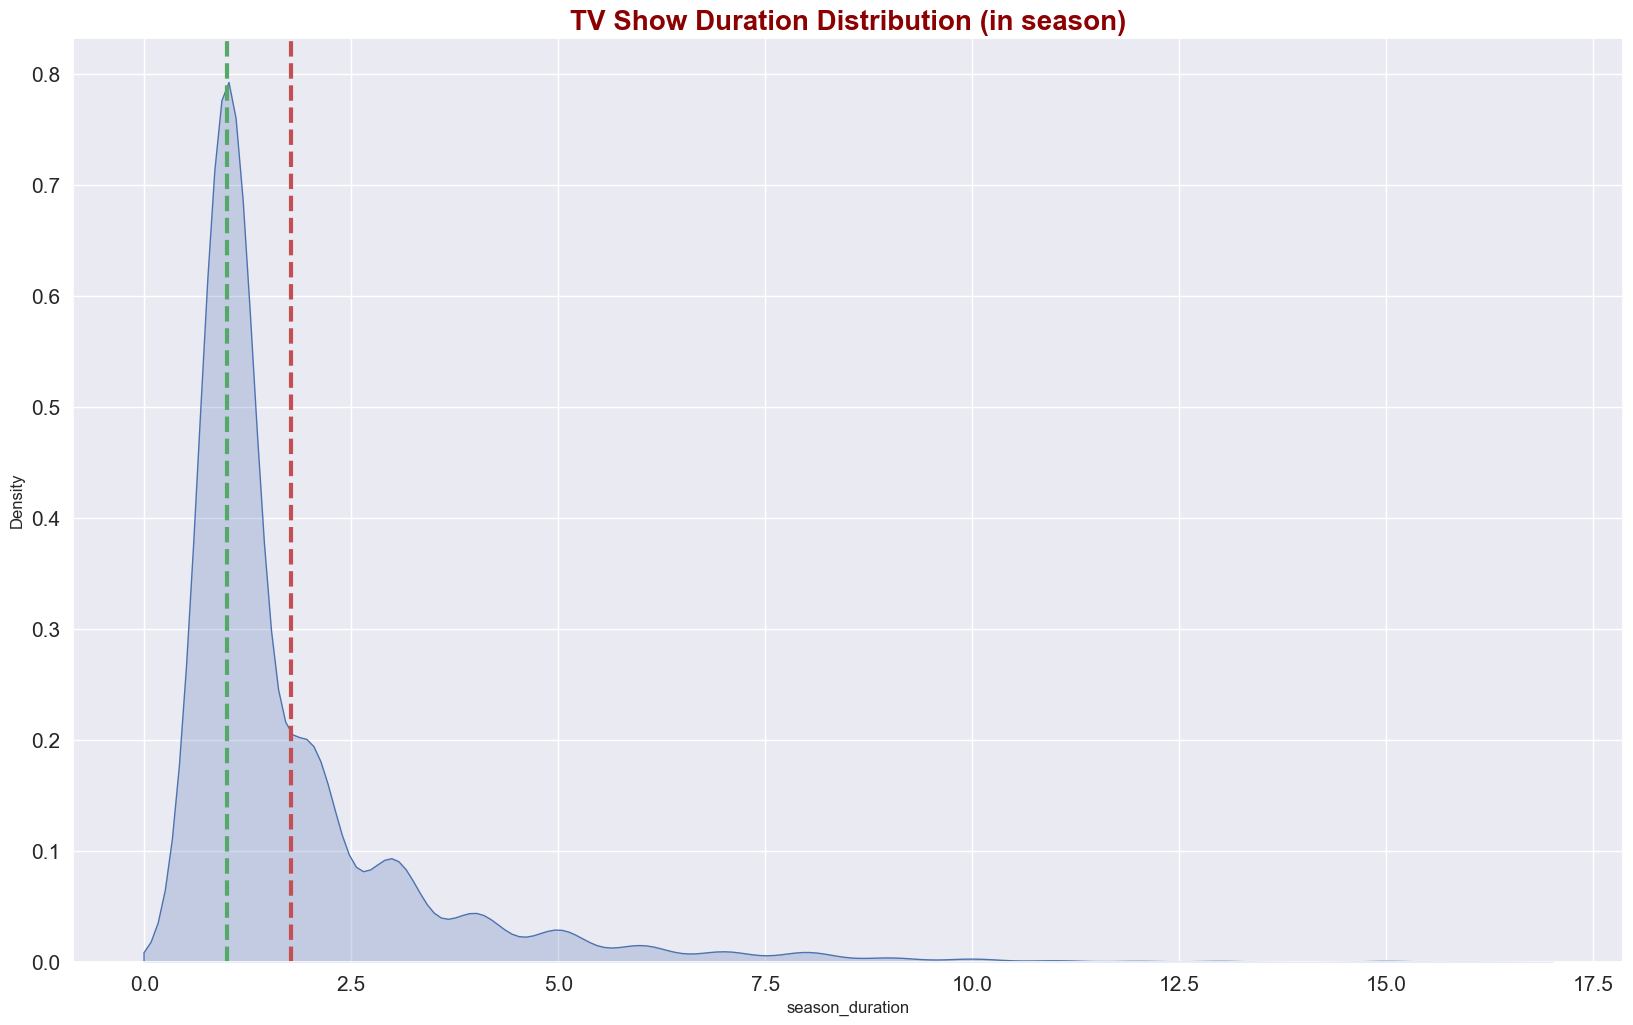

In [22]:
df['season_duration'] = df.duration.apply(lambda x : int(x.split()[0]) if 'Season' in x else np.nan)
plot.kde(df, 'season_duration', 'TV Show Duration Distribution (in season)', True)

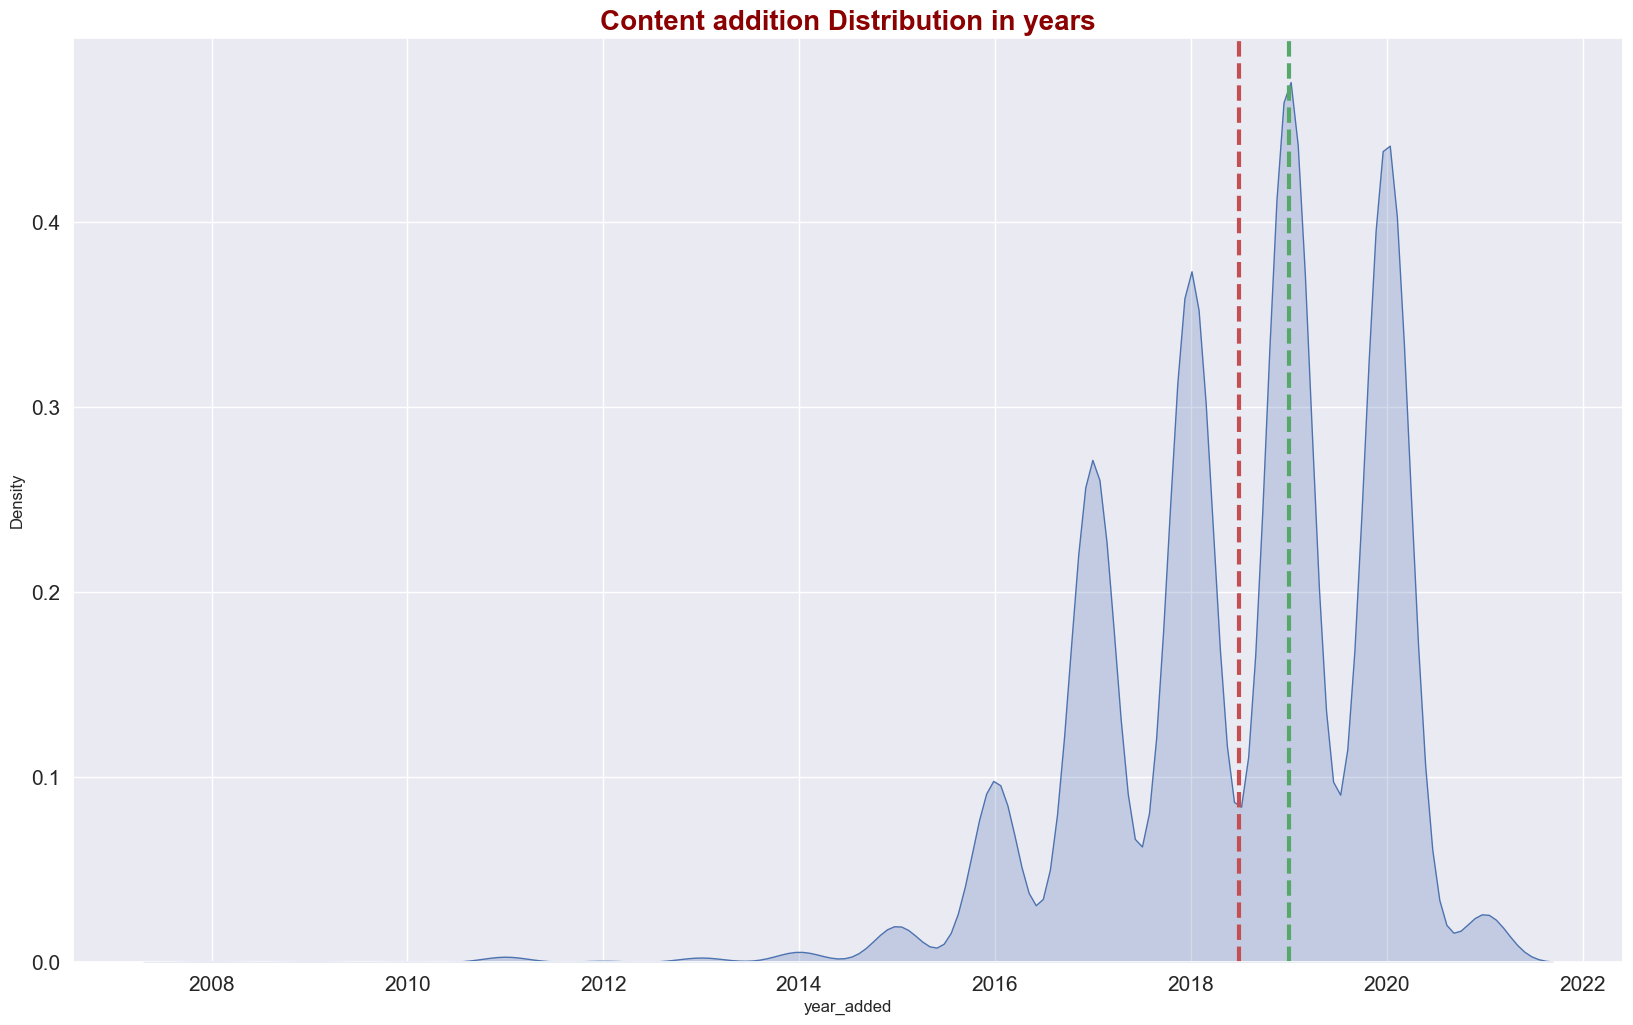

In [23]:
df['year_added'] = df.date_added.apply(lambda x : int(x.split(",")[1]) if type(x) == str else x)
plot.kde(df, 'year_added', 'Content addition Distribution in years', True)

### Seems like they add content every second year

In [24]:
from wordcloud import WordCloud
def create_wordcloud(text, title):
    # Sample text data

    # Generate word cloud
    wordcloud_ = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontdict={'family' : 'sans', 'color' : 'darkred', 'size' : 20, 'weight' : 'bold'})
    plt.show()

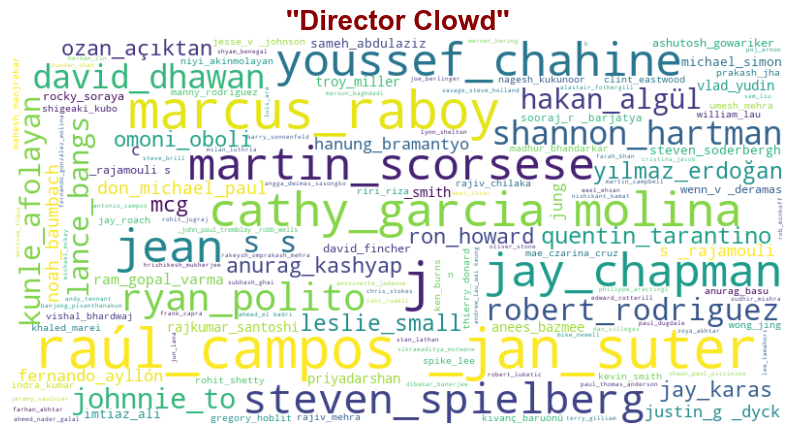

In [25]:
aux = df[df.director != 'Not Found']
aux = aux[aux.director != 'NotFound']

aux['new'] = aux.director.apply(lambda x: "_".join(x.split()))
text = ", ".join(map(str.lower, aux.new))
create_wordcloud(text, "''Director Clowd''")

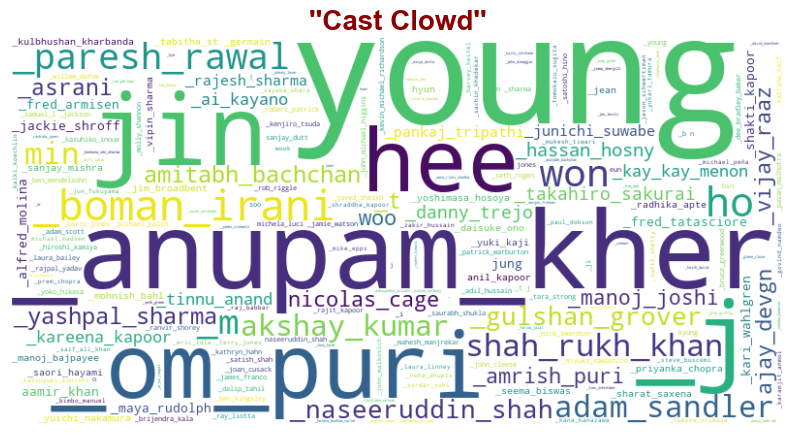

In [26]:
aux = df[df.cast != 'Not Found']
aux = aux[aux.cast != 'NotFound']
aux['new_cast'] = aux.cast.apply(lambda x: "_".join(x.split()))
text = ", ".join(map(str.lower, aux.new_cast))
create_wordcloud(text, "''Cast Clowd''")

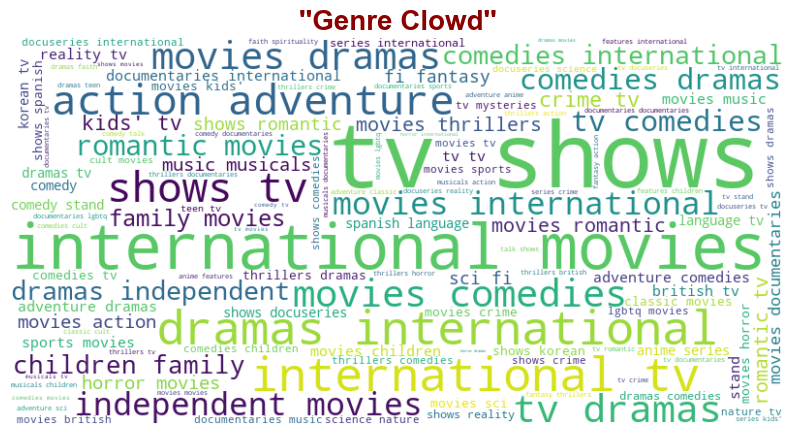

In [27]:
text = ", ".join(map(str.lower, aux.listed_in))
create_wordcloud(text, "''Genre Clowd''")

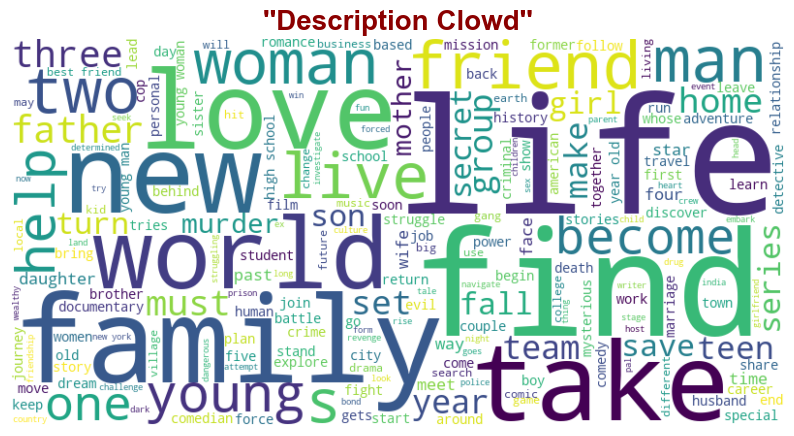

In [28]:
text = " ".join(map(str.lower, aux.description))
create_wordcloud(text, "''Description Clowd''")

### Textual Preprocessing for content based recommendations. 
### The program will find the similarity in movie text[description] and based on the similarity highest similar 5 movies / TV show will be recommended. 

In [29]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,season_duration,year_added
0,s1,TV Show,3%,Not Found,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,4.0000,2020.0000


In [30]:
df_backup = df.copy()

In [31]:
df = df_backup.copy()

In [32]:
# to not take NOT FOUND string into consideration I will remove them from text
for i in range(df.shape[0]):
    if any([df.loc[i, 'director'] == 'Not Found', df.loc[i, 'director'] == 'NotFound']) :
        df.loc[i, 'director'] = "-"
    if any([df.loc[i, 'cast'] == 'Not Found', df.loc[i, 'cast'] == 'NotFound']) :
        df.loc[i, 'cast'] = "-"
    

In [33]:
# The error is due to null values in country, because nulls are floats and in syntax where I am creating tags feature
# due inability of NaNs to get merged with strings it is creating NaN in tags featurs. I should fill all nans with 
# punctuation so that it will be removed later while removing punctuation#
df.country.fillna("-", inplace= True)

In [34]:
df['tags'] = df['type'] + " "+ df['director'] +" "+ df['cast'] +" "+ df['country'] +" "+ df['rating'] +" "+ df['listed_in'] +" "+ df['description']

In [35]:
df['tags'] = df.tags.apply(lambda x : x.lower())

### remove punctuations --> remove stop words --> stem the data

In [36]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [37]:
"".join([x for x in df.tags[0] if x not in string.punctuation + "’"])

'tv show  joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

In [38]:
df['processed_tags'] = "*"
for index, row in df.iterrows():

    # remove punctuation
    punct = "".join([x for x in row.tags if x not in string.punctuation + "’"])

    # remove numbers 
    punct = "".join([y for y in punct if y not in '1234567890'])
    # Tokenize the text
    tokens = word_tokenize(punct)  # Convert to lowercase for stemming

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # join and fill
    processed_text = ' '.join(stemmed_tokens)
    df.loc[index, 'processed_tags'] = processed_text

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Creating TF-IDF model
tfidf_vectorizer = TfidfVectorizer(max_features = 10000)
tfidf_matrix = tfidf_vectorizer.fit(df.processed_tags)

In [41]:
#tfidf_matrix.vocabulary_.items()

In [42]:
tfidf_matrix = tfidf_matrix.transform(df.processed_tags)

In [43]:
features_names = tfidf_vectorizer.get_feature_names_out()
features_names  

array(['aakash', 'aamir', 'aaron', ..., 'úrsula', 'ünlüoğlu', 'şahin'],
      dtype=object)

In [44]:
matrix = tfidf_matrix.toarray()
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
matrix.shape

(7787, 10000)

### 44137 features

In [46]:
from sklearn.decomposition import PCA

In [47]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(matrix)

PCA(random_state=0)

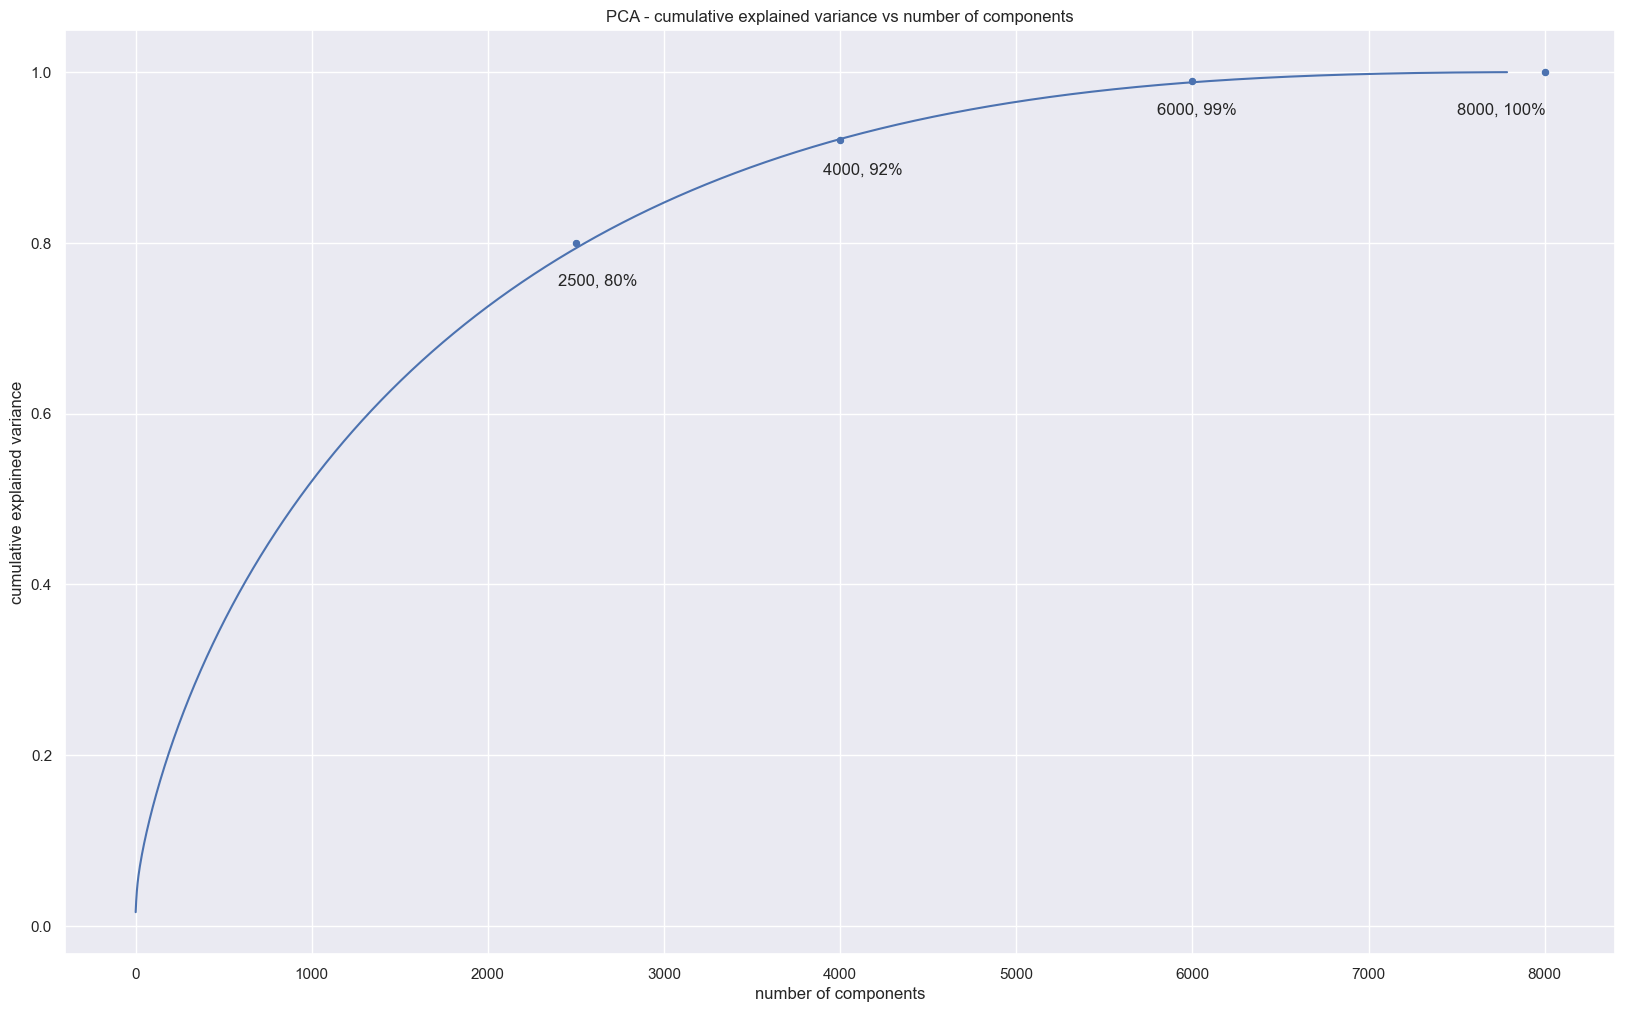

In [48]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
sns.scatterplot(x = [2500, 4000, 6000, 8000], y = [0.8, 0.92, 0.99, 1])
plt.text(2400, 0.75, '2500, 80%')
plt.text(3900, 0.88, '4000, 92%')
plt.text(5800, 0.95, '6000, 99%')
plt.text(7500, 0.95, '8000, 100%')
"""
plt.axhline(y= 0.80, color='red', linestyle='--')
plt.axhline(y= 0.92, color='red', linestyle='--')
plt.axhline(y= 0.99, color='red', linestyle='--')
plt.axhline(y= 1, color='red', linestyle='--')

plt.axvline(x= 2500, color='green', linestyle='--')
plt.axvline(x= 4000, color='green', linestyle='--')
plt.axvline(x= 6000, color='green', linestyle='--')
plt.axvline(x= 8000, color='green', linestyle='--')
"""
plt.show()

### 80% of variance is explained by 2500 features.
### while 99% of variance is explained by 6000 features. A considerable jump in number of feature, may be resulting in over fitting and slow model also.
### While 4000 features with 92% variance catching might be optimal in this case
### As reason behind this is, to get the accurate recommendations I need data which explains maximum variance with minimum features.
### Thus by using 4000 features I can build an optimal clustering model~

In [49]:
# reducing the dimensions to get accurate and important 4000 features
pca = PCA(n_components=4000, random_state=0)
pca.fit(matrix)

PCA(n_components=4000, random_state=0)

In [50]:
# transformed features
X = pca.transform(matrix)

c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.011736855881527057


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.011975896166993382


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.012488242529325044


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.006602902719821573


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.007146345655518131


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.008666765393777141


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.00533483444145587


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.0057221747993280005


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.006215149361382883


c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.007425078697628515


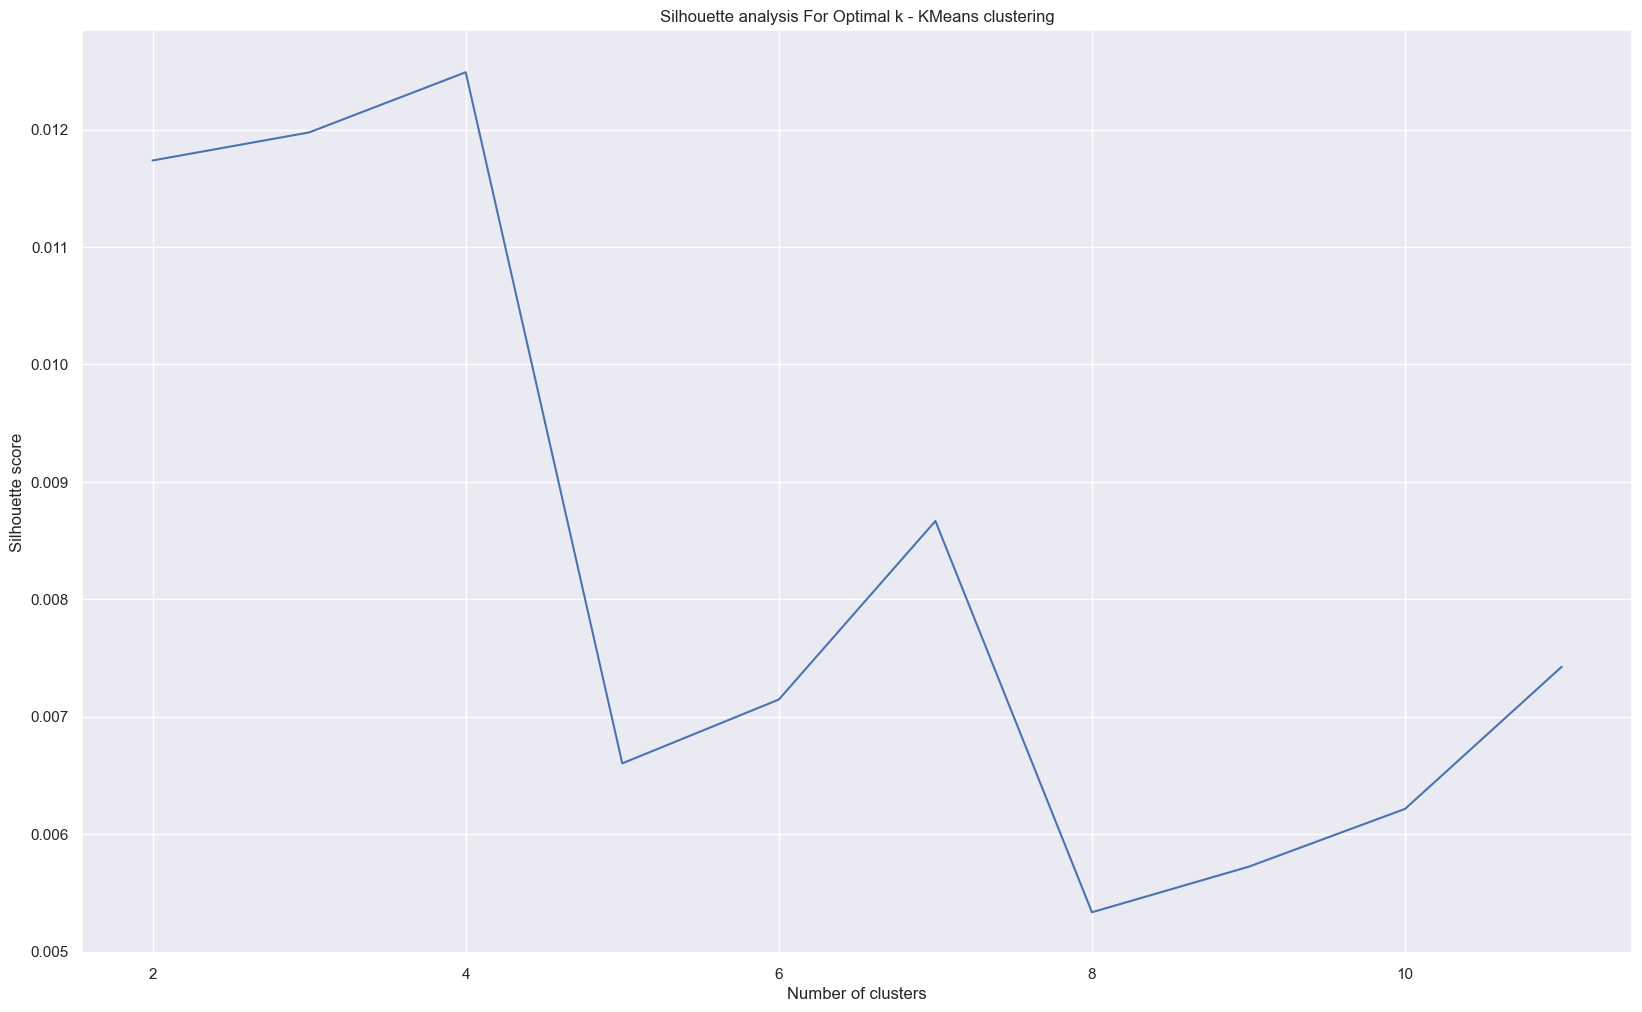

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_avg = []
# range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_avg.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(range(2,12), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [52]:
# Clustering the data into 4 clusters as silhouette score is max 0.012488242529325044
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(X)

c:\Users\Varshil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [53]:
# Evaluation metrics - distortion, Silhouette score
#The distortion metric for clustering is a measure of the average Euclidean distance between points 
# in a cluster and its centroid. It is calculated as the average of the squared distances from the 
# cluster centers of the respective clusters to each data point.
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f'Kmeans distortion = {kmeans_distortion}')
print(f'Silhouette Score = {kmeans_silhouette_score}')

Kmeans distortion = 6852.110610924899
Silhouette Score = 0.01252580121220761


In [54]:
# updating kmeans cluster number attribute
df['clusters'] = kmeans.labels_

In [55]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,season_duration,year_added,tags,processed_tags,clusters
0,s1,TV Show,3%,-,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,4.0000,2020.0000,"tv show - joão miguel, bianca comparato, miche...",tv show joão miguel bianca comparato michel go...,3


In [57]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

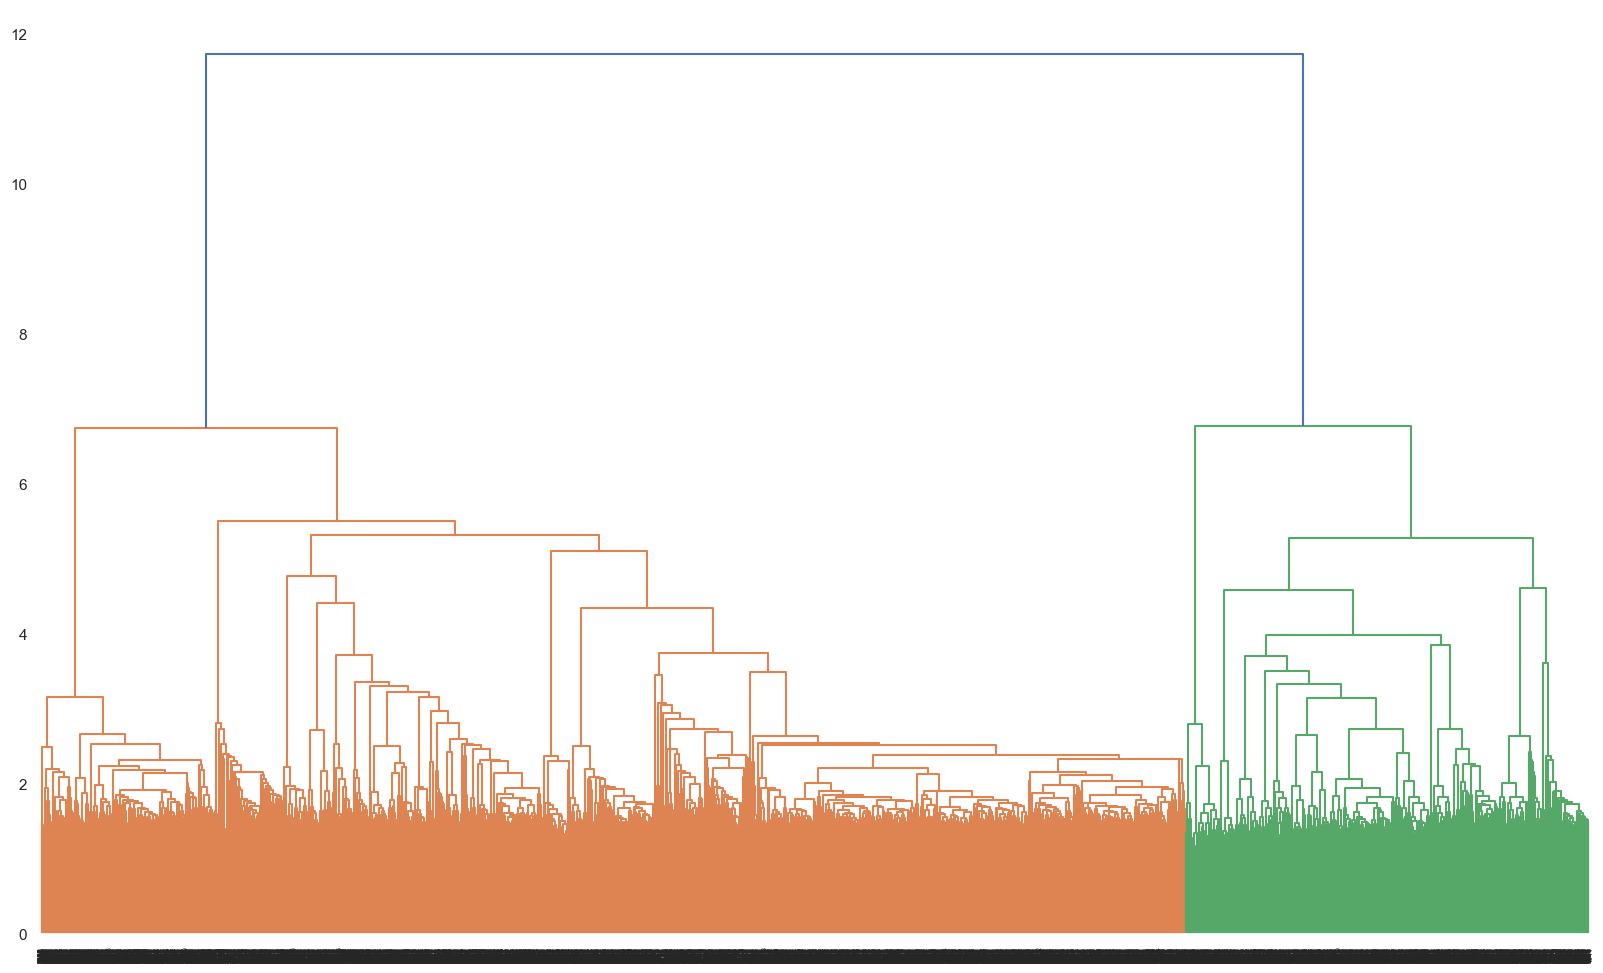

In [58]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

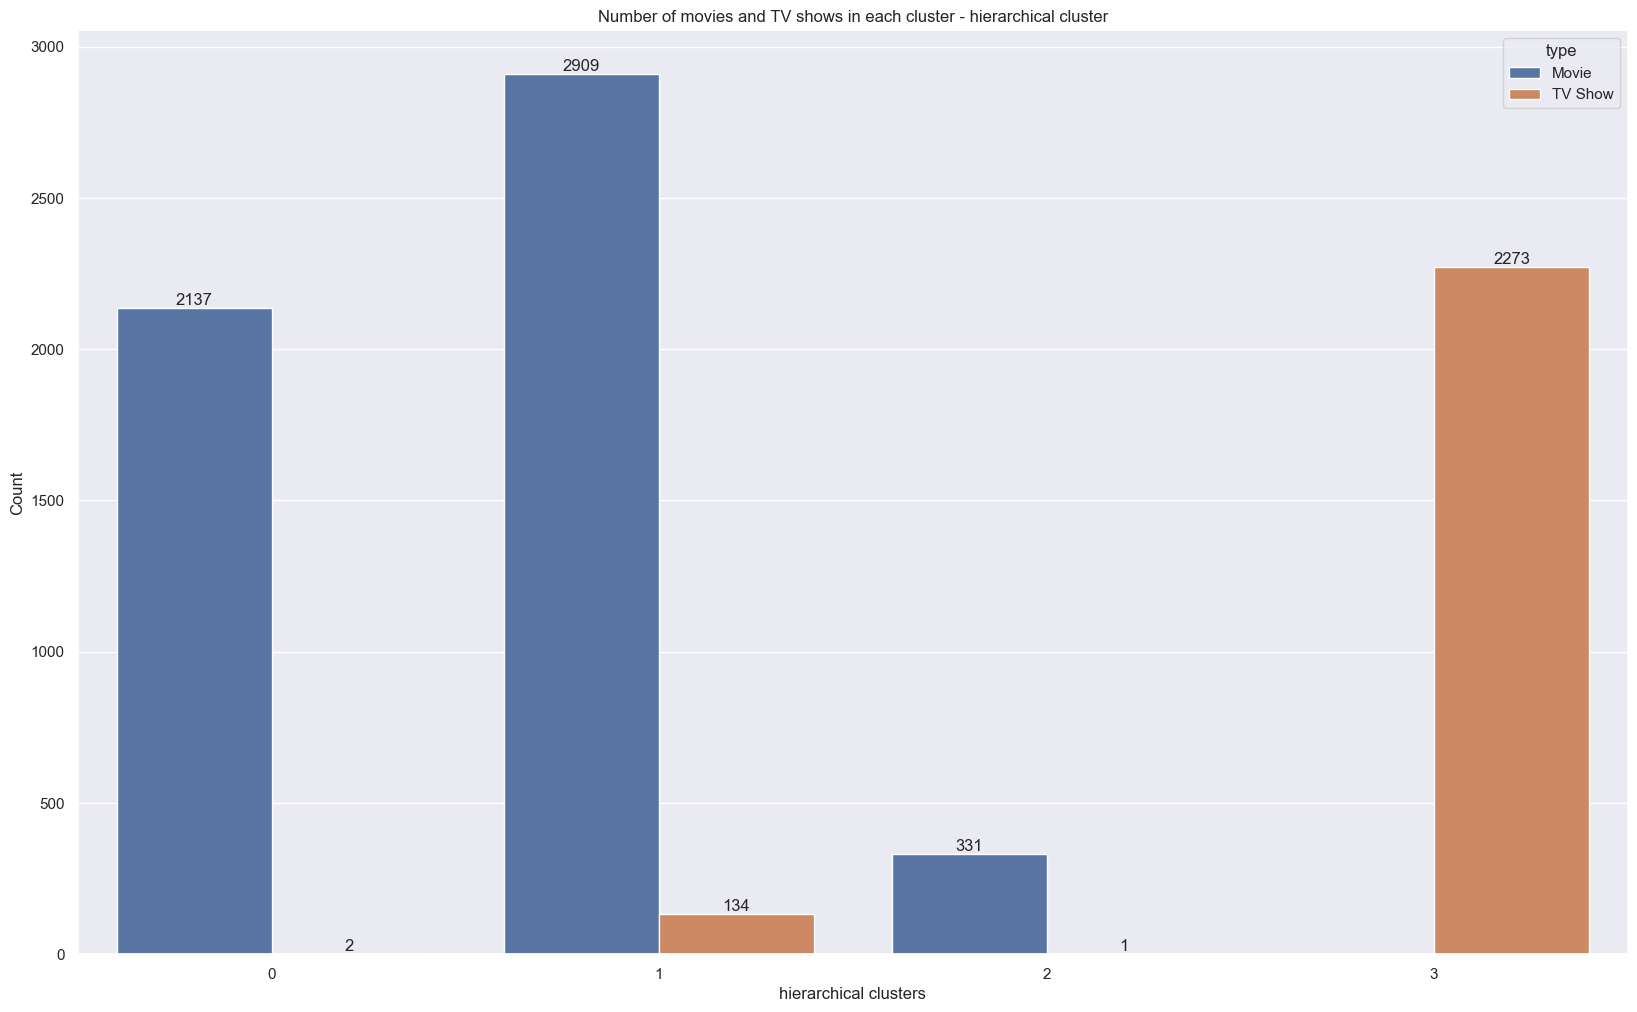

In [116]:
bar = sns.countplot(df, x = 'clusters', hue = 'type')
plt.title('Number of movies and TV shows in each cluster - hierarchical cluster')
plt.xlabel('hierarchical clusters')
plt.ylabel('Count')
for label in bar.containers:
    bar.bar_label(label)

In [117]:
from sklearn.metrics.pairwise import cosine_similarity

In [118]:
# setting cos_similarity
# creates a matrix of similairty of each title with each title 
# thus creates a square matrix of shape : num of titles x num of titles 
cos_similarity = cosine_similarity(X)

In [119]:
rec_df = df.copy()

In [143]:
movie = "Don 2"

In [144]:
# Find the index position of the input movie
index = rec_df[rec_df['title'] == movie].index[0]

# Sort the movies based on similarity score to find distances from recommended movies
# fetches similarity scores of the current title with every other title
# orders in descending value of similarity scores [to get the most similar title]
# and before ordering enumerates them because while sorting the index will be lost
distances = sorted(list(enumerate(cos_similarity[index])), reverse=True, key=lambda x:x[1])

# List the top 5 recommended movies
for i in distances[1:6]:
    print(df.iloc[i[0]].title)

Don
Dil Dhadakne Do
My Next Guest with David Letterman and Shah Rukh Khan
Happy New Year
No Entry
